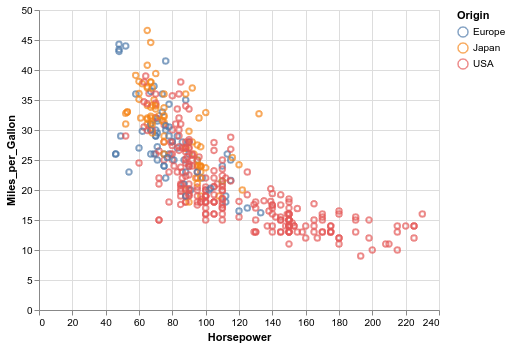

In [10]:
import altair as alt
alt.renderers.enable('default')
# load a simple dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()
alt.renderers.set_embed_options(actions=False)
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

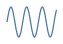

In [17]:
import altair as alt
import numpy as np
import pandas as pd

x = np.arange(100)
source = pd.DataFrame({
  'x': x,
  'f(x)': np.sin(x / 5)
})

alt.Chart(source).mark_line(strokeWidth=1.25).encode(
    alt.X('x',axis=None),
    alt.Y('f(x)', axis=None)
).properties(
    width=50,
    height=30
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
)

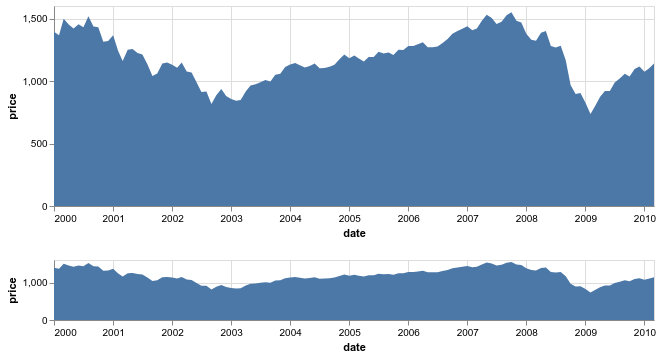

In [18]:
import altair as alt
from vega_datasets import data

source = data.sp500.url

brush = alt.selection(type='interval', encodings=['x'])

base = alt.Chart(source).mark_area().encode(
    x = 'date:T',
    y = 'price:Q'
).properties(
    width=600,
    height=200
)

upper = base.encode(
    alt.X('date:T', scale=alt.Scale(domain=brush))
)

lower = base.properties(
    height=60
).add_selection(brush)

alt.vconcat(upper, lower)

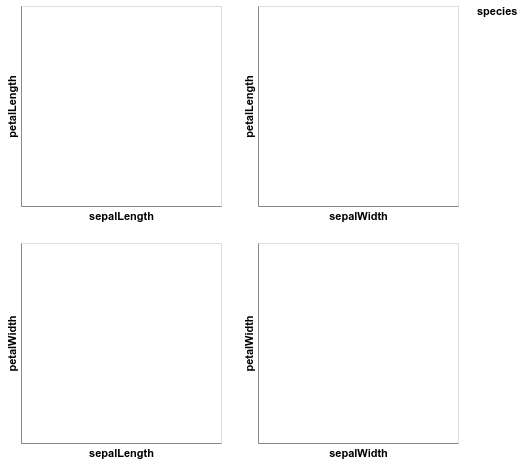

In [16]:
import altair as alt
from vega_datasets import data

iris = data.iris.url

base = alt.Chart().mark_point().encode(
    color='species:N'
).properties(
    width=200,
    height=200
).interactive()

chart = alt.vconcat(data=iris)
for y_encoding in ['petalLength:Q', 'petalWidth:Q']:
    row = alt.hconcat()
    for x_encoding in ['sepalLength:Q', 'sepalWidth:Q']:
        row |= base.encode(x=x_encoding, y=y_encoding)
    chart &= row
chart

In [19]:
iris

'https://vega.github.io/vega-datasets/data/iris.json'